In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests
import shutil
import bs4
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
import cv2
import time

In [89]:
#import excel untuk link tiktok
df_link = pd.read_excel('link tiktok.xlsx')

In [36]:
PATH = "C:\chromedriver_win32\chromedriver.exe"
driver = webdriver.Chrome(PATH)



#ambil url yang ingin di scrape
link = 'https://www.tiktok.com/@dogcat_0327/video/7207585274312871211'

driver.get(link)

time.sleep(10) #nanti diganti tunggunya sampai captha nya nge load

#solver captcha
#ambil link captcha image
captcha = driver.find_element (By.XPATH,"//*[@id='captcha-verify-image']")
src = captcha.get_attribute('src')

#download captcha image
response = requests.get(src, stream=True)
with open('captcha_img.jpeg', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

#ambil link puzzle captcha piece
captcha_piece = driver.find_element (By.XPATH,"//*[@id='tiktok-verify-ele']/div/div[2]/img[2]")
src = captcha_piece.get_attribute('src')

#download captcha piece
response = requests.get(src, stream=True)
with open('captcha_piece.jpeg', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response



C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_30996\299618784.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


array([[[182,  53,   8],
        [181,  52,   7],
        [180,  51,   6],
        ...,
        [159,  19,   2],
        [158,  18,   1],
        [158,  18,   1]],

       [[182,  53,   8],
        [181,  52,   7],
        [179,  50,   5],
        ...,
        [159,  19,   2],
        [158,  18,   1],
        [158,  18,   1]],

       [[184,  57,  12],
        [183,  56,  11],
        [183,  54,   9],
        ...,
        [159,  20,   1],
        [159,  20,   1],
        [159,  20,   1]],

       ...,

       [[ 51, 138, 188],
        [ 56, 143, 193],
        [ 60, 147, 197],
        ...,
        [ 95, 154, 203],
        [ 84, 150, 199],
        [ 93, 162, 212]],

       [[ 37, 124, 174],
        [ 46, 133, 183],
        [ 56, 143, 193],
        ...,
        [ 38,  95, 140],
        [ 95, 162, 207],
        [ 84, 154, 201]],

       [[ 47, 134, 184],
        [ 56, 143, 193],
        [ 66, 153, 203],
        ...,
        [  7,  65, 107],
        [ 60, 125, 169],
        [ 67, 138, 182]]

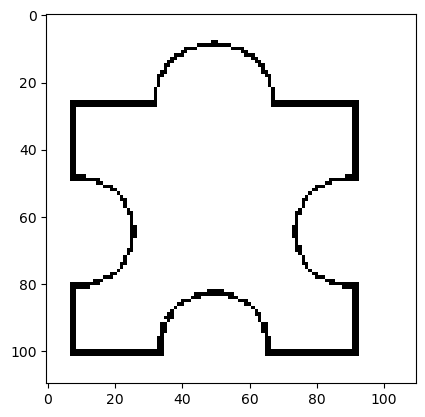

In [37]:
#baca img
img = cv2.imread('captcha_img.jpeg')
img_piece = cv2.imread('captcha_piece.jpeg')

#SHAPE MATCHING FUNCTION
def bin_img(image):
    img = cv2.imread(image)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_img = cv2.threshold(img_gray, 242, 255, cv2.THRESH_BINARY_INV)[1]
    plt.imshow(binary_img, cmap='gray')

    return binary_img

capt = bin_img('captcha_img.jpeg')
piece = bin_img('captcha_piece.jpeg')

#matching shape
match = cv2.matchTemplate(capt, piece, cv2.TM_CCOEFF)

#cek x, y
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

#lebar dan tinggi
w = piece.shape[1]
h = piece.shape[0]

#buat kotak nya
cv2.rectangle(img, max_loc, (max_loc[0]+w, max_loc[1]+h), (0, 255, 255), 2)



In [42]:
#drag slider ke x yang tepat
slide = driver.find_element(By.XPATH, "//*[@id='secsdk-captcha-drag-wrapper']")
move = webdriver.ActionChains(driver)

move.click_and_hold(slide).move_by_offset(max_loc[0], 0).release()


In [ ]:
#export hasil scrape tiktok
df_result.to_excel('hasil scrape data tiktok.xlsx', index=False)

# coret2an

In [20]:
#untuk membersihkan link yg di profile sebelum disamakan dengan link yg kita punya
c = 'https://www.tiktok.com/@dndalstri._/video/7233570284572249370?is_from_webapp=1&sender_device=pc&web_id=7205425525594031618'
c[:c.find('?')]

'https://www.tiktok.com/@dndalstri._/video/7233570284572249370'

## Prototype

In [ ]:
PATH = "C:\chromedriver_win32\chromedriver.exe"
driver = webdriver.Chrome(PATH)

#list kosong
link = []
judul = []
username = []
likes = []
views = []
comment = []
share = []

#ambil url yang ingin di scrape
for i in range(len(df_link.iloc[:,0])):
    link = df_link.iloc[i,0]

    driver.get("link")

    time.sleep(10)

    #ada captcha solver nanti disini

    time.sleep(2)

    #exit login bar
    ext = driver.find_element(By.XPATH, "//*[@id='login-modal']/div[2]/svg")
    ext.click()

    time.sleep(2)

    #buka profile
    element = driver.find_element(By.XPATH, "//*[@id='main-content-video_detail']/div/div[2]/div[1]/div[2]/div/a[2]/span[1]")
    element.click()

    time.sleep(2)
    #nanti ada scroll down dulu sampai abis baru naek ke atas lagi setelah itu baru looping dalamnya

    #looping didalem profile mereka samapi ketemu link yang sama
    for j in range():
        wad
        

#Hasil data yang di ambil
df_result = pd.DataFrame(list(zip(link, judul, username, likes, views, comment, share)), columns=['link'. 'judul', 'username', 'likes', 'views', 'comment', 'share'])

#keluar chrome
#driver.quit()